<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
# 공부시간과 성적의 관계 

|공부시간|성적|예측값|
|:---:|:---:|:---:|
|2|81|**83.6**|
|4|93|**88.2**|
|6|91|**92.8**|
|8|97|**97.4**|

# fake_a_b는 임의의 예측값을 넣으면된다 
# 아래는 공식으로 순차적으로 풀기위해 
# 기본에서 계산처리한값들 

##  공식
* $ 공부시간(x) 평균 : (2 + 4 + 6 + 8) / 4 = 5 $
* $ 성적(y) 평균     : (81 + 93 + 91 + 97) / 4 = 90.5 $
### 1.  $ 기울기 a = {(x - x평균)(y - y평균)의 합     \over (x - x평균)^2의 합    } $
==> $ a = {(2-5)(81-90.5)+(4-5)(93-90.5)+(6-5)(91-90.5)+(8-5)(97-90.5) \over ((2-5)^2+(4-5)^2+(6-5)^2+(8-5)^2} $   
===> $ {46 \over 20} $   
====> $ 기울기 a = 2.3 $   
### 2 . $ y절편의 값 b = y의 평균 - (x의 평균 \times 기울기 a) $
==> $ b = 90.5 - (5 \times 2.3) $   
===> $ b = 90.5 - 11.5 $   
====> $ y절편의 값 b = 79 $
### 3. $ y = ax + b $
==> $ y = 2.3x + 79 $    
===> $y = 2.3 \times 2 + 79  = 83.6 $   
===> $y = 2.3 \times 4 + 79  = 88.2 $   
===> $y = 2.3 \times 6 + 79  = 82.8 $   
===> $y = 2.3 \times 8 + 79  = 87.4 $   
### 4.$ 오차 값 $
==> $ 오차 = 예측값 - 실제값 $   
===> $ 83.6 - 81 = 1.0 $   
===> $ 88.2 - 93 = 25.0 $   
===> $ 92.8 - 91 = 9.0 $  
===> $ 97.4 - 97 = 9.0 $
### 5 $ 평균 제곱 오차(MSE) $
==> $ \sum\limits_{i}^n (\hat{y_i} - y_i)^2 $   
===> $ (83.6 - 81)^2 = 6.7599999999999705   $         
===> $ (88.2 - 93)^2 = 23.039999999999974   $   
===> $ (92.8 - 91)^2 = 3.2399999999999896   $   
===> $ (97.4 - 97)^2 = 0.16000000000000456  $   
==> $ \frac{1}{n}\sum (\hat{y_i} - y_i)^2   $      
 > $ (6.7599999999999705 + 23.039999999999974 + 3.2399999999999896 + 0.16000000000000456) / 4 $   
 > $ 평균 제곱 오차(MSE) = 8.299999999999985 $

In [1]:
import numpy as np
import matplotlib.pyplot as pl


# 공부 시간X , 성적Y 리스트 생성 
# i[0] = [2, 4, 6, 8]
# i[1] = [81, 93, 91, 97]
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

print("x1 => ", x1)
print("x2 => ", x2)
print("y => ", y)

x1 =>  [2, 4, 6, 8]
x2 =>  [0, 4, 2, 3]
y =>  [81, 93, 91, 97]


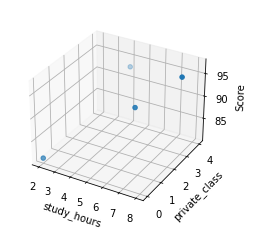

In [2]:
#그래프로 확인해 봅니다.
ax = pl.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11 
ax.scatter(x1, x2, y)
pl.show()

In [3]:
# 리스트 ==> 배열 각 개별 처리 위함
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)
           
print("x1_data => ", x1_data)
print("x2_data => ", x2_data)
print("y_data => ", y_data)

# 기울기 a와 y의 절편 b의 값 초기화
a1 = 0
a2 = 0
b = 0

# 학습진행률
lr = 0.01

# 반복횟수
epochs = 20001

# 이해를 돕기위한 단순 출력
ex_y_pred = (a1 + lr) * x1_data + (a2 + lr) * x2_data + b
print("y_pred_공식 => ", ex_y_pred)
ex_y_pred = (a1 + lr) * x1_data + (a2 + lr) * x2_data + 81 # 2 * 2 + 81...
print("y_pred_실제값대입경우=> ", ex_y_pred)
ex_y_pred = (a1 + lr) * x1_data + (a2 + lr) * x2_data + 81 # 2 * 2 + 81...
print("y_pred_실제값대입경우=> ", ex_y_pred)
ex_error = y_data - ex_y_pred # 오차 값 [ 실제값 - 예측 값]
print("ex_error=> ", ex_error)

x1_data =>  [2 4 6 8]
x2_data =>  [0 4 2 3]
y_data =>  [81 93 91 97]
y_pred_공식 =>  [0.02 0.08 0.08 0.11]
y_pred_실제값대입경우=>  [81.02 81.08 81.08 81.11]
y_pred_실제값대입경우=>  [81.02 81.08 81.08 81.11]
ex_error=>  [-0.02 11.92  9.92 15.89]


In [4]:
# 몇 세대를 진행 할것인가.
for i in range(epochs):
    y_pred = a1 * x1_data  + a2 * x2_data + b # 예측값 [ y = ax + b ]
    error = y_data - y_pred # 오차 값 [ 실제값 - 예측 값]
    
    # 평균제곱 오차를 a로 편미분한 결과
    a1_diff = -(2/len(x1_data)) * sum(x1_data * (error))
    a2_diff = -(2/len(x2_data)) * sum(x2_data * (error))
    # 평균제곱 오차를 b로 편미분한 결과
    b_diff = -(2/len(x1_data)) * sum(error)
    
    a1 = a1 - lr * a1_diff # 학습률을 곱해 기존의 a1값을 업데이트 
    a2 = a2 - lr * a2_diff # 학습률을 곱해 기존의 a2값을 업데이트 
    b = b - lr * b_diff # 학습률을 곱채 기존의 b값을 업데이트
    
    if i%100 == 0: # 백번 반복될때 마다 현재의 a값 b값 출력
        print("a1_diff = %.07f, a2_diff = %.07f, b_diff = %.07f " %(a1_diff, a2_diff, b_diff))
        print("epoch = %.f, 기울기a1 = %.07f, 기울기a2 = %.07f, 절편 = %.07f"%(i, a1, a2, b))


a1_diff = -928.0000000, a2_diff = -422.5000000, b_diff = -181.0000000 
epoch = 0, 기울기a1 = 9.2800000, 기울기a2 = 4.2250000, 절편 = 1.8100000
a1_diff = 2.5732786, a2_diff = 0.8198949, b_diff = -17.4833747 
epoch = 100, 기울기a1 = 9.5109563, 기울기a2 = 5.0270184, 절편 = 22.9204617
a1_diff = 1.8550265, a2_diff = 0.6360678, b_diff = -12.7246722 
epoch = 200, 기울기a1 = 7.3238280, 기울기a2 = 4.2949551, 절편 = 37.8750591
a1_diff = 1.3489059, a2_diff = 0.4654605, b_diff = -9.2608121 
epoch = 300, 기울기a1 = 5.7380576, 기울기a2 = 3.7489167, 절편 = 48.7589332
a1_diff = 0.9816338, a2_diff = 0.3389175, b_diff = -6.7398444 
epoch = 400, 기울기a1 = 4.5843506, 기울기a2 = 3.3506641, 절편 = 56.6800218
a1_diff = 0.7144095, a2_diff = 0.2466683, b_diff = -4.9051299 
epoch = 500, 기울기a1 = 3.7447296, 기울기a2 = 3.0607682, 절편 = 62.4448393
a1_diff = 0.5199333, a2_diff = 0.1795211, b_diff = -3.5698597 
epoch = 600, 기울기a1 = 3.1336712, 기울기a2 = 2.8497839, 절편 = 66.6403632
a1_diff = 0.3783975, a2_diff = 0.1306521, b_diff = -2.5980756 
epoch = 700, 기울기a1 =

a1_diff = 0.0000000, a2_diff = 0.0000000, b_diff = -0.0000000 
epoch = 9300, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = 0.0000000, a2_diff = 0.0000000, b_diff = -0.0000000 
epoch = 9400, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = 0.0000000, a2_diff = 0.0000000, b_diff = -0.0000000 
epoch = 9500, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = 0.0000000, a2_diff = 0.0000000, b_diff = -0.0000000 
epoch = 9600, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = 0.0000000, a2_diff = 0.0000000, b_diff = -0.0000000 
epoch = 9700, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = -0.0000000, a2_diff = -0.0000000, b_diff = -0.0000000 
epoch = 9800, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = 0.0000000, a2_diff = -0.0000000, b_diff = -0.0000000 
epoch = 9900, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = -0.0000000, a2_diff = -0.0000000, b_diff = -0.0000000 
epoch = 10000, 

a1_diff = -0.0000000, a2_diff = -0.0000000, b_diff = -0.0000000 
epoch = 19600, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = -0.0000000, a2_diff = -0.0000000, b_diff = -0.0000000 
epoch = 19700, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = 0.0000000, a2_diff = -0.0000000, b_diff = -0.0000000 
epoch = 19800, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = -0.0000000, a2_diff = -0.0000000, b_diff = -0.0000000 
epoch = 19900, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
a1_diff = -0.0000000, a2_diff = -0.0000000, b_diff = -0.0000000 
epoch = 20000, 기울기a1 = 1.5000000, 기울기a2 = 2.2857143, 절편 = 77.8571429
